<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# 선형회귀 분석

### **변수 종류에 따른 분석 유형**

<img src="fig1.png" title="변수 종류에 따른 분석 유형" align="left"></img><br/>

## 중요 평가 지표
### 1. R<sup>2</sup>
### 2. RMSE(Root Mean squre Error) <br>
    

### 단순 선형 회귀분석

In [1]:
import pandas as pd 
import numpy as np 
house = pd.read_csv('../data/kc_house_data.csv')
house = house[["price","sqft_living"]]
## 독립변수와 종속변수의 선형 가정 
house.corr()


,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


#### >> **독립변수와 종속변수간의 상관관계 0.7** <br>

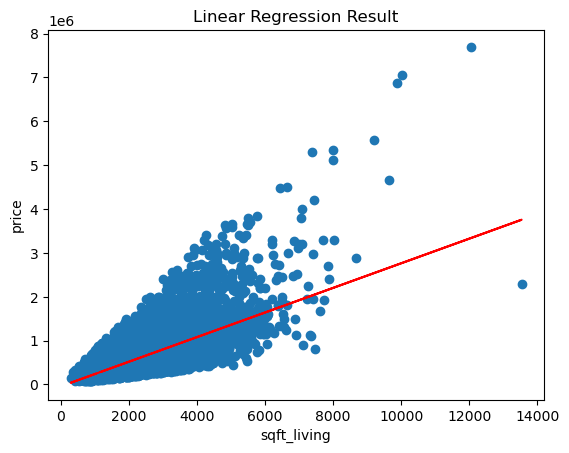

In [2]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
# 변수 할당 
y = house['price']
X = house[['sqft_living']]
# 단순선형회귀모형 적합
lr = ols('price ~ sqft_living',data=house).fit()
y_pred = lr.predict(X)
# 시각화 
plt.scatter(X, y) ## 원 데이터 산포도
plt.plot(X, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()


1. **모형이 데이터를 잘 적합하고 있는가?** <br>
\> 직관적으로 직선이 모든 데이터를 설명하지 못하고, 변수가 커질 수록 분산이 커지는 패턴을 가지므로 데이터를 충분히 설명하지 못함

In [3]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        19:13:54   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. 회귀 모형이 통계적으로 유익한가? <br>
\> F 통계량과 p-value를 확인하면, p가 0 으로 회귀모델이 통계모델로 유의함
3. 모형은 데이터를 얼마나 설명할 수 있는가? <br>
\> R<sub>2</sub>값이 49.3%의 데이터를 설명한다고 할 수 있음
4. 모형 내의 회귀계수는 유의한가? <br>
\> sqft_living 변수의 회귀계수 p-value값 유의값보다 작으므로 유의한 변수로 볼 수 있음 <br>

**회귀식 : Price = sqft_living*208.6 -43580.7**

## 다중공선성
- $VIF = $$1\over{1-R^2}$
- 변수선택법

In [14]:
import pandas as pd
# 데이터 불러오기
Cars = pd.read_csv('../data/Cars93.csv')
Cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [15]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# ols 모델의 formula을 정의할 때, 일부 특수문자는 쓸 수 없기에, 컬럼 특수문자 제거 
Cars.columns = Cars.columns.str.replace(".","")
model = smf.ols(formula ="Price ~ EngineSize + RPM + Weight+ Length + MPGcity + MPGhighway", data = Cars)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 21 May 2023   Prob (F-statistic):           4.88e-14
Time:                        20:21:47   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
Cars[['EngineSize','RPM' , 'Weight','Length','MPGcity','MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [17]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수 
y,X = dmatrices("Price ~ EngineSize + RPM + Weight+ Length + MPGcity + MPGhighway",
                data = Cars,return_type ="dataframe")
# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1,len(X.columns)): 
    vif_list.append([variance_inflation_factor(X.values,i), X.columns[i]])
pd.DataFrame(vif_list,columns=['vif','variable'])


,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [18]:
model = smf.ols(formula ="Price ~ EngineSize + RPM + Weight  + MPGhighway", data = Cars)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.26e-15
Time:                        20:25:06   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


In [20]:
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model


In [21]:
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])


In [22]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002156F6B4688>
forward
Processed  1 models on 0 predictors in 0.002996683120727539
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002156F699E48>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002156F6B3488>
forward
Processed  2 models on 1 predictors in 0.002998828887939453
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002156F6B4AC8>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002156F699F88>
forward
Processe

In [23]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 21 May 2023   Prob (F-statistic):           6.75e-16
Time:                        20:27:55   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. 모델 설명 <br>
\> 단계적 선택법을 통해서 3개의 변수가 포함된 다중 선형 회귀 모델을 채택하였음. <br>
\> Adj R<sup>2</sup> 값이 54.7% 전체 데이터를 설명하고 있음
2. 회귀식? <br>
\> **y = 0.0073*Weight +  0.0071* RPM + 4.3054*EngineSize - 51.7933
3. 회귀계수 설명 <br>
\> 모델 자체 성능은 좋지 않아 회귀 계수의 값이 정확하다고 말할 수 없지만, 가장 큰 영향을 주는 변수는 EngineSize 라고 할 수 있음 <br>
